# Визуализация данных: Matplotlib и Seaborn

## А зачем? 

Визуализация данных помогает быстрее понять суть данных, прикинуть зависимости, выявить закономерности и тенденции, обнаруживать аномалии (выбросы). Это фундаментальный этап анализа данных, мы начинаем строить свои предположения исходя из информации, полученной от графиков, гистограмм, скаттерплотов (диаграмм рассеяния). Это не всемогущий инструмент, его использование (особенно некорректное) может приводить к ошибкам и ложным предположениям, но его нельзя не использовать из-за количества иинформации с которого можно начать анализ.

## Типы графиков | Экспресс-версия

Можно сказать, что ниже экспресс-версия этой части. Здесь я представил самые распространённые графики/диаграммы в анализе данных, но не все. Есть способы рисовать графики в 4-ёх мерном пространстве, это даже не так сложно, но мы опустим. Аффинные, полярные, цилиндрические и другие системы координат также рассмотрены не будут, во-первых потому что встречаются они не так часто, а во-вторых, вы всегда сможете найти это сами и разобраться будет не сложнее, чем в материале, представленном ниже.

**ВНИМАНИЕ**: код ниже не запустится, если у вас отстутствует библиотека `matplotlib` (подразумевается, что `numpy` у вас уже есть).

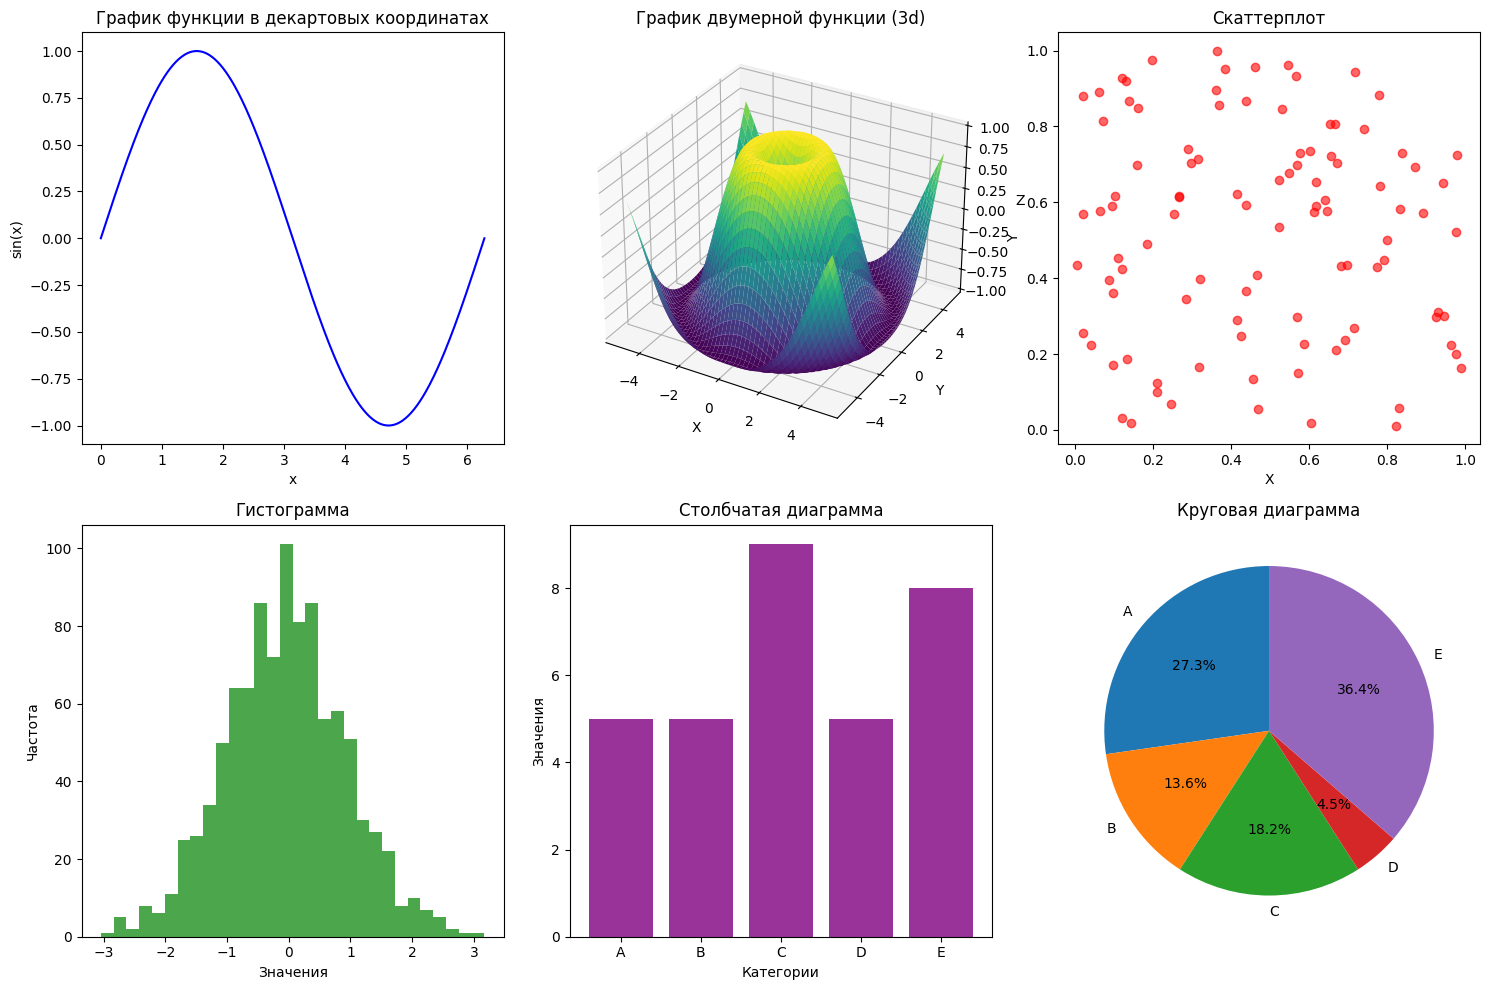

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2, 3, 1)
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x)
ax1.plot(x, y, color='blue')
ax1.set_title("График функции в декартовых координатах")
ax1.set_xlabel("x")
ax1.set_ylabel("sin(x)")

ax2 = fig.add_subplot(2, 3, 2, projection='3d')
X = np.linspace(-5, 5, 50)
Y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))
ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.set_title("График двумерной функции (3d)")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")

ax3 = fig.add_subplot(2, 3, 3)
x_scatter = np.random.rand(100)
y_scatter = np.random.rand(100)
ax3.scatter(x_scatter, y_scatter, color='red', alpha=0.6)
ax3.set_title("Скаттерплот")
ax3.set_xlabel("X")
ax3.set_ylabel("Y")

ax4 = fig.add_subplot(2, 3, 4)
data = np.random.randn(1000)
ax4.hist(data, bins=30, color='green', alpha=0.7)
ax4.set_title("Гистограмма")
ax4.set_xlabel("Значения")
ax4.set_ylabel("Частота")

ax5 = fig.add_subplot(2, 3, 5)
categories = ['A', 'B', 'C', 'D', 'E']
values = np.random.randint(1, 10, size=len(categories))
ax5.bar(categories, values, color='purple', alpha=0.8)
ax5.set_title("Столбчатая диаграмма")
ax5.set_xlabel("Категории")
ax5.set_ylabel("Значения")

ax6 = fig.add_subplot(2, 3, 6)
pie_values = np.random.randint(1, 10, size=len(categories))
ax6.pie(pie_values, labels=categories, autopct='%1.1f%%', startangle=90)
ax6.set_title("Круговая диаграмма")

plt.tight_layout()
plt.show()


## Установка | Полная версия (отсюда и далее)

`pip install matplotlib seaborn` (мы устанавливаем две библиотеки сразу). Кстати, работу с терминалом из блокнота мы уже демонстрировали, но, если кто не догадался, то пакеты также можно устанавливать прямиком из нотбука. Хорошим тоном является комментирование таких строк, этому правилу последуем и мы. При необходимости выполнить команду строку нужно расскоментировать и запустить (ничем не отличается от запуска обычной python-ячейки; на Windows иногда не работает, в таком случае используйте более "традиционный" подход через терминал).

In [ ]:
# %pip install matplotlib seaborn

## База Matplotlib

### `Figure` и `Axis`

Matplotlib держится на двух китах: ~~Stack Overflow и ChatGPT~~ `Figure` и `Axes`. Первое $\text{---}$ верхнеуровневый контейнер, грубо говоря холст, на котором рисуются все графики, легенды, надписи и прочее. Внутри одного `Figure` может быть несколько `Axes`. Последнее $\text{---}$ область внутри `Figure`, неосредственно на которой строится сам график, там располагаются оси координат, линии, точки, подписи, в общем всё то, что относится напрямую к визуализации. `Axes` содержит `Axis` (оси) и `Artist` $\text{---}$ элементы (линии, точки и т.д.). `Axis` всегда не более трёх. Для упомянутых графиков многомерных ($\mathbb{R}^{\geqslant 4}$) пространств используются ухищрения как изменение цвета, формы или размера для отображения изменения по четвёртой оси. Изменения в `Axes` не влияет на весь `Figure`. 

### Основные команды 

#### Импорт

In [4]:
import matplotlib.pyplot as plt # я помню, что выше я уже импортировал
                                # эту библиотеку

#### Построение графиков

Вообще, если планируется использовать графики в Jupyter, то нужно использовать следующую магическую команду: `%matplotlib inline` (лучше всего в самом начале нотбука), чтобы графики отражались напрямую в VS Code. У меня всё работает и без этой команды, но об этом нужно помнить и можно сказать, что это "правило хорошего тона", которое нужно соблюдать.

In [5]:
%matplotlib inline

Другое правило хорошего тона перед каждым новым графиком создавать новый объект `Figure`. Если вам нужен только один простой график за весь документ, можно не создавать. Чисто в теории, если у вас только один график на ячейку, то тоже можно не создавать, но некоторые так не считают и рекомендуют создавать новый объект всё равно. Кого слушать $\text{---}$ дело ваше.  Инициализация переменной `fig` также необязательна (указать игнорирование возвращаемого значения можно с помощью `_` вместо имени переменной), но если вам нужна гибкость в настройках размеров, разрешения, фона, расположения и количество осей и другое, то тогда вам `fig` нужен.

Последнее правило хорошего тона: для отображения вызывать `plt.show()`. График отобразится и без вызова, но если вы перейдёте из блокнота в обычный скрипт, то там уже так не сработает и для того, чтобы привыкнуть мы будем использовать `plt.show()`. В своих проектах вам делать это не обязательно, но если вы работаете не один, а в команде и если в команде ваш голос не решающий, то договоритесь о каком-то едином стиле; собственно, речь о единообразии идёт с первой части (которая 1, а не 0).

In [17]:
# _ = plt.figure() # возвращаемая переменная игнорируется
fig = plt.figure() 
pass

<Figure size 640x480 with 0 Axes>

##### Lineplot 

С этим термином есть небольшие проблемы, поскольку в английском это слово обозначает привычные нам графики, то в переводе на русский мы получаем "Линейный график", что несколько отличается по значению от первоначального (e.g.: график $y=x^2$ $\text{---}$ это `Lineplot`, но это *не* линейный график), поэтому под `Lineplot` мы будем иметь в виду обычный график, хоть это весьма неконкретное понятие. 

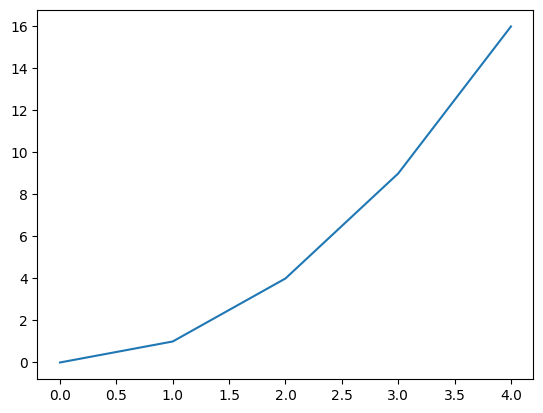

In [84]:
x = [0, 1, 2, 3, 4]
y = [0, 1, 4, 9, 16]
plt.plot(x, y)
plt.show()

Для большего удобства чтения графика можно добавить сетку.

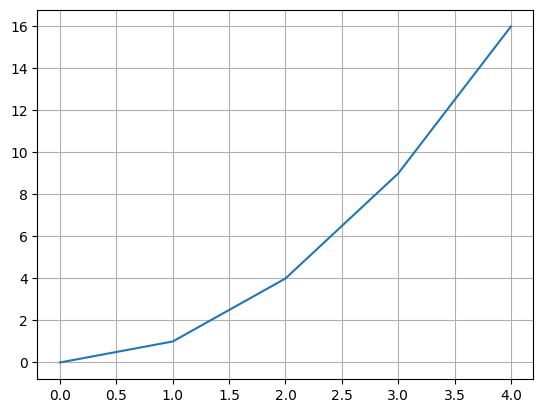

In [85]:
fig = plt.figure()
plt.plot(x, y)
plt.grid() # тоже после plot
plt.show()

##### Scatterplot / Скаттерплот / Диаграмма рассеивания

Пример ниже искусственен донельзя, но вместе с тем и нагляден. Скаттерплот нужен для того, чтобы прикидывать зависимость одного параметра от другого и смотреть как зависит третий параметр от них обоих. В качестве "третьего параметра" у нас выступает размер, у вас, скорее всего, это будет искомое значение, будь то число или класс. Необязательно использовать размер, с таким же успехом (или даже большим) можно раскрасить их в разные цвета: тепловая диаграмма (меньше -- холодные цвета, больше -- тёплые цвета) или конечный набор цветов (в случае классификации/кластеризации, например). Для того, чтобы легче было оценивать большие скопления каждую точку делают полупрозрачной (ну или восмьюпрозрачной, как в нашем случае) и скопление точек в правом верхнем углу теперь привлекает ещё больше внимания. 

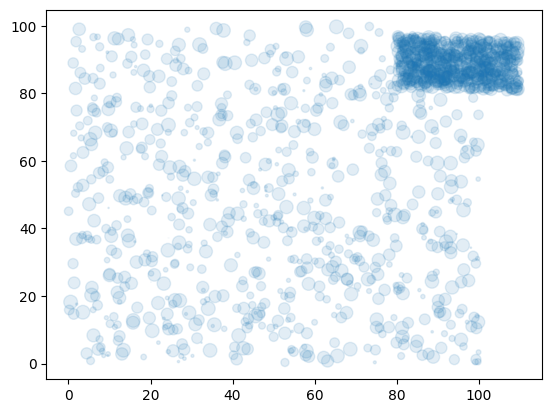

In [82]:
fig = plt.figure() 

count = 750
x = np.random.rand(count) * 30 + 80
y = np.sqrt(15**2 - x) + 70 +  np.random.rand(count) * 15

noise_x = np.random.rand(count) * 100
noise_y = np.random.rand(count) * 100

x = np.concatenate((x, noise_x))
y = np.concatenate((y, noise_y))

sizes = 100 * np.random.rand(count*2)  # размеры точек

plt.scatter(x, y, s=sizes, alpha=0.125)
plt.show()

Я, кстати, знаю, что нет слова: "Восмьюпрозрачный", спасибо.

##### Гистограммы

`bins` -- указывает количество столбцов в гистограмме (что такое гистограмма вы должны были проходить в курсе теорвера, поэтому объяснять не буду).

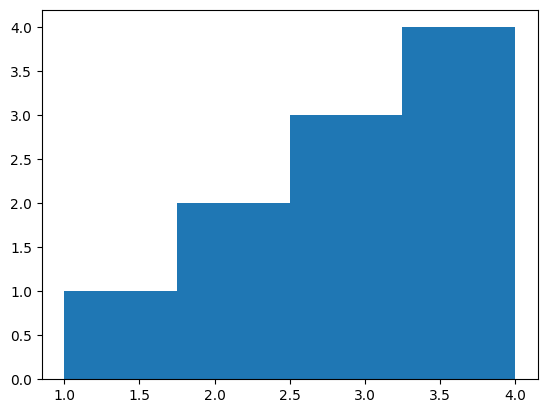

In [40]:
fig = plt.figure() 
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
plt.hist(data, bins=4)
plt.show()

##### Столбчатые диаграммы

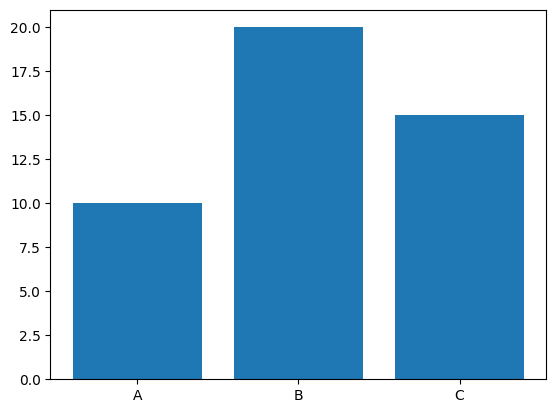

In [41]:
fig = plt.figure() 
categories = ['A', 'B', 'C']
values = [10, 20, 15]
plt.bar(categories, values)
plt.show()

#### Форматирование графиков

##### Подписи и легенда

Всё довольно очевидно (прелести самодокументирующегося кода, ага). 

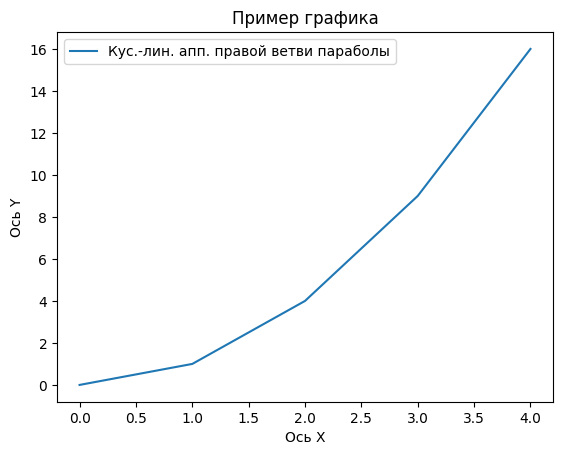

In [42]:
fig = plt.figure() 

x = [0, 1, 2, 3, 4]
y = [0, 1, 4, 9, 16]

plt.xlabel("Ось X")
plt.ylabel("Ось Y")
plt.title("Пример графика")

# label -- для легенды
plt.plot(x, y, label='Кус.-лин. апп. правой ветви параболы')
plt.legend() # легенда добавляется после plot, но до show
plt.show()

##### Красота
> А оно всегда будет таким скучным синим цветом? Можно ли это как-то изменить?

Можно и иногда даже нужно. Я приведу таблицу и ссылки на официальную документацию для Lineplot, покажу пример, а все интересующие вас моменты сможете найти сами, оно всё плюс-минус одинаковое.

| Параметр           | Описание                                                    | Примеры значений                                                                  |
|--------------------|-------------------------------------------------------------|-----------------------------------------------------------------------------------|
| color              | Цвет линии или точек                                        | `'blue'`, `'#FF5733'`, `'r'`                                                      |
| linestyle          | Тип линии                                                   | `'-'` (сплошная), `'--'` (пунктирная), `'-.'` (штрихпунктирная), `':'` (точечная) |
| linewidth (lw)     | Толщина линии                                               | `1.0`, `2.5`                                                                      |
| marker             | Тип маркера для точек                                       | `'o'` (круг), `'s'` (квадрат), `'^'` (треугольник), `'D'` (ромб), `'*'` (звезда)  |
| markersize (ms)    | Размер маркера                                              | `6`, `8`, `10`                                                                    |
| markerfacecolor    | Цвет заливки маркера                                        | `'red'`, `'green'`, `'#00FF00'`                                                   |
| markeredgecolor    | Цвет контура маркера                                        | `'black'`, `'blue'`                                                               |
| markeredgewidth    | Толщина контура маркера                                     | `1.0`, `2.0`                                                                      |

Официальная документация:
- [matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
- [Markers API](https://matplotlib.org/stable/api/markers_api.html)
- [Примеры линий и маркеров](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) (может быть немного душновато)


###### Краткое форматирование

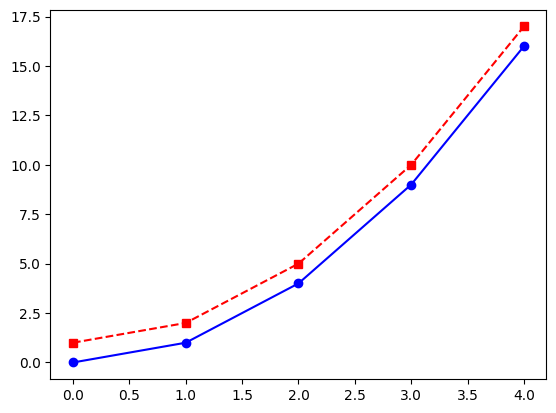

In [43]:
fig = plt.figure() 

# b = синий
# o = кружок
# - = линия
plt.plot(x, y, 'bo-')

# новый Figure не создаём, т.к. хотим два графика в одном

# r = красный
# s = квадрат
# -- = пунктир
plt.plot(x, np.array(y)+1, 'rs--')
plt.show()

###### Подробное форматирование

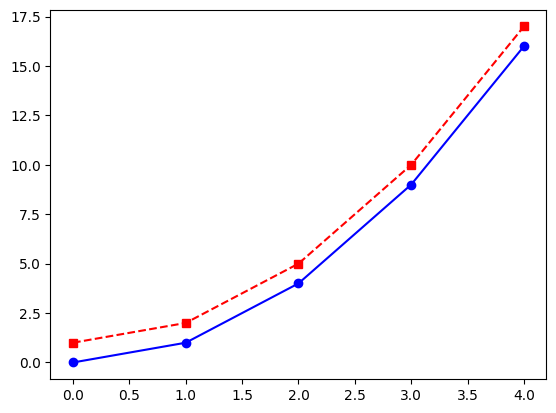

In [54]:
fig = plt.figure() 

# blue = синий
# o = кружок
# solid = линия
plt.plot(x, y, color='blue', marker='o', linestyle='solid')

# новый Figure не создаём, т.к. хотим два графика в одном

# r = красный
# s = квадрат
# -- = пунктир
plt.plot(x, np.array(y)+1, color='r', marker='s', linestyle='--')
plt.show()

##### Настройка осей

Для задания деления осей используется `plt.xtics` и `plt.ytics`. Для задания минимальных/максимальных значений по осям `xlim` и `ylim`.

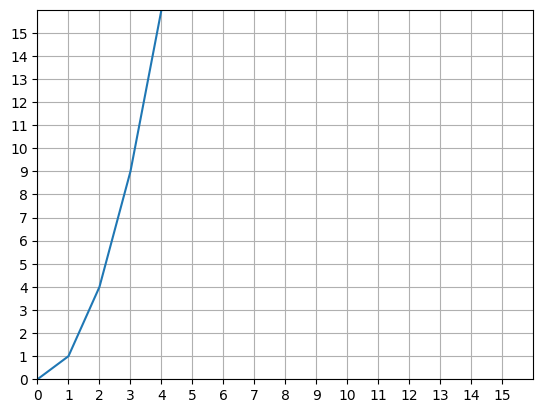

In [88]:
x = [0, 1, 2, 3, 4]
y = [0, 1, 4, 9, 16]

fig = plt.figure()

plt.xticks(np.arange(0, 16, 1))
plt.yticks(np.arange(0, 16, 1))

plt.xlim(0, 16)
plt.ylim(0, 16)

plt.plot(x, y)
plt.grid()
plt.show()

Без указания лимитов.

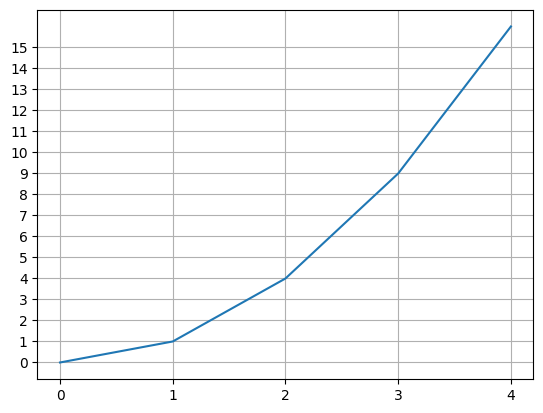

In [91]:
fig = plt.figure()

plt.xticks(np.arange(0, 16, 1))
plt.yticks(np.arange(0, 16, 1))

plt.plot(x, y)
plt.grid()
plt.show()

Без указания деления

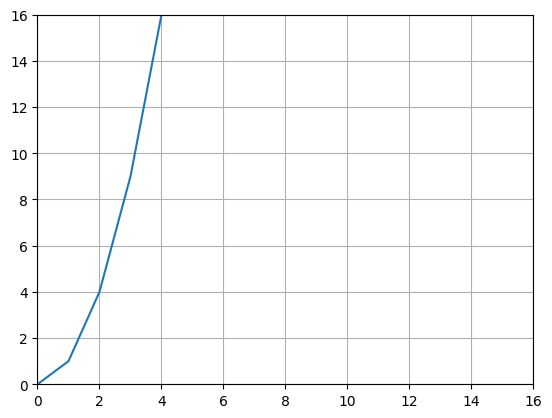

In [92]:
fig = plt.figure()

plt.xlim(0, 16)
plt.ylim(0, 16)

plt.plot(x, y)
plt.grid()
plt.show()

##### Аннотация

<a name="for_curious1">Для любознательных</a>: узнать про `plt.annotate()`.


#### Сохранение графиков

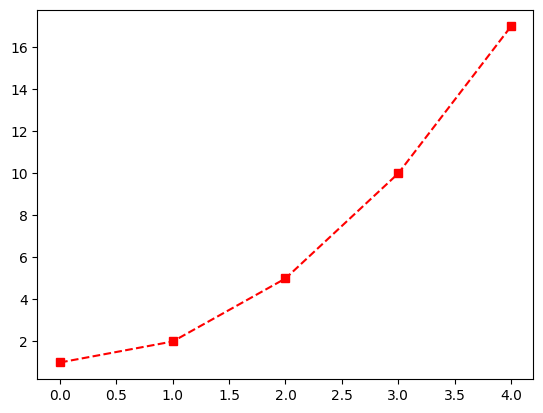

In [57]:
file_name = 'my plot.png'
plt.plot(x, np.array(y)+1, color='r', marker='s', linestyle='--')
plt.savefig(file_name)

## Для любознательных

(напоминание, ссылки внутри документа почему-то работают только в html и pdf версии, VS Code не хочет)

1. [Здесь](#for_curious1)